In [5]:
# 导入svm和数据集
from sklearn import svm, datasets
import numpy as np
#调用svc
clf = svm.SVC()

#载入鸢尾花模型
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print (Y)

#开始进行训练
clf.fit(X, Y)

#predict()进行简单的预测
pre_y = clf.predict(X[5:10])
# 对比两个矩阵是否相等
print (pre_y == Y[5:10])

#对test进行预测
test = np.array([[5.1, 2.9, 1.8, 3.6]])
test_y = clf.predict(test)
print (test_y)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ True  True  True  True  True]
[2]


Automatically created module for IPython interactive environment
[ True  True  True  True  True]
yy= [-20.04314604 -19.31185381 -18.58056159 -17.84926936 -17.11797714
 -16.38668492 -15.65539269 -14.92410047 -14.19280824 -13.46151602
 -12.7302238  -11.99893157 -11.26763935 -10.53634713  -9.8050549
  -9.07376268  -8.34247045  -7.61117823  -6.87988601  -6.14859378
  -5.41730156  -4.68600933  -3.95471711  -3.22342489  -2.49213266
  -1.76084044  -1.02954821  -0.29825599   0.43303623   1.16432846
   1.89562068   2.6269129    3.35820513   4.08949735   4.82078958
   5.5520818    6.28337402   7.01466625   7.74595847   8.4772507
   9.20854292   9.93983514  10.67112737  11.40241959  12.13371182
  12.86500404  13.59629626  14.32758849  15.05888071  15.79017294]
support_vectors_= [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]


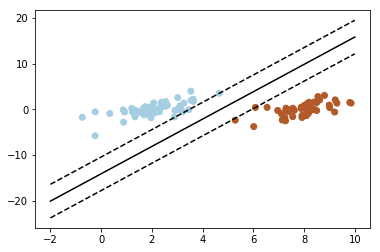

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

print (__doc__)


def loadDataSet(fileName):
    """
    对文件进行逐行解析,从而得到第行的类标签和整个数据矩阵
    """
    dataMat = []
    labelMat = []
    with open(fileName, 'r') as fp_r:
        for line in fp_r.readlines():
            lineArr = line.strip().split('\t')
            dataMat.append([float(lineArr[0]), float(lineArr[1])])
            labelMat.append(float(lineArr[2]))
        return dataMat, labelMat

X, Y = loadDataSet(r'C:\Users\wd\Documents\GitHub\MachineLearningStudy\data\SVM\testSet.txt')
X = np.mat(X)

#拟合一个svm模型
clf = svm.SVC(kernel="linear")
clf.fit(X, Y)
pre_Y = clf.predict(X[5:10])
print (pre_Y == Y[5:10])

# 下面全部为绘制一个平面图
# 获得分隔超平面
w = clf.coef_[0]
# 斜率
a = -w[0]/w[1]
# 从5到5 顺序间隔采样50个样本
xx = np.linspace(-2, 10)
# 二维的直线方程
yy = a*xx - (clf.intercept_[0])/w[1]
print ("yy=", yy)

#通过支持向量绘制分隔超平面
print ("support_vectors_=", clf.support_vectors_)
b = clf.support_vectors_[0]
yy_down = a*xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a *xx + (b[1] - a*b[0])

#plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up,   'k--')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter(X[:, 0].flat, X[:, 1].flat, c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()